In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import traceback
import os
import pathlib
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, Activation, add, GlobalAvgPool2D
from keras.models import Model
from keras import regularizers
from keras.utils import plot_model
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Sequential, load_model
from keras.preprocessing.image import load_img, img_to_array
import datautils
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
train_dir = 'D:\Rice\COMP 540/data/train_set/'
val_dir = 'D:\Rice\COMP 540/data/val_set/'
test_dir = 'D:\Rice\COMP 540/data/test_set/'
train_df = pd.read_csv('D:\Rice\COMP 540/data/train_labels.csv')
val_df = pd.read_csv('D:\Rice\COMP 540/data/val_labels.csv')
test_df = pd.read_csv('D:\Rice\COMP 540/data/sample_submission.csv')

In [3]:
len(train_df)

118475

In [4]:
len(val_df)

11994

In [5]:
len(test_df)

28377

## Data visulization

In [28]:
img_size = 256
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [29]:
train_df = pd.read_csv('./data/train_merge.csv')
val_df = pd.read_csv('./data/val_merge.csv')
train_dir = './data/train_set'
val_dir = './data/val_set'

In [30]:
batch_size=1
train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='img_name',
        y_col='class',
        class_mode='categorical',
        directory=train_dir,  # this is the target directory
        shuffle=False,
        target_size=(img_size, img_size),  # all images will be resized to 150x150
        batch_size=batch_size)

Found 118475 validated image filenames belonging to 251 classes.


In [31]:
train_df

,img_name,label,class
0,train_101733.jpg,211,dolmas
1,train_101734.jpg,211,dolmas
2,train_101735.jpg,211,dolmas
3,train_101736.jpg,211,dolmas
4,train_101737.jpg,211,dolmas
...,...,...,...
118470,train_101728.jpg,123,fried_rice
118471,train_101729.jpg,123,fried_rice
118472,train_101730.jpg,123,fried_rice
118473,train_101731.jpg,123,fried_rice


In [32]:
train_generator.classes

[78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,


In [33]:
train_generator.class_indices

{'adobo': 0,
 'ambrosia_food': 1,
 'apple_pie': 2,
 'apple_turnover': 3,
 'applesauce': 4,
 'applesauce_cake': 5,
 'baby_back_rib': 6,
 'bacon_and_eggs': 7,
 'bacon_lettuce_tomato_sandwich': 8,
 'baked_alaska': 9,
 'baklava': 10,
 'barbecued_spareribs': 11,
 'barbecued_wing': 12,
 'beef_bourguignonne': 13,
 'beef_carpaccio': 14,
 'beef_stroganoff': 15,
 'beef_tartare': 16,
 'beef_wellington': 17,
 'beet_salad': 18,
 'beignet': 19,
 'bibimbap': 20,
 'biryani': 21,
 'blancmange': 22,
 'boiled_egg': 23,
 'boston_cream_pie': 24,
 'bread_pudding': 25,
 'brisket': 26,
 'bruschetta': 27,
 'bubble_and_squeak': 28,
 'buffalo_wing': 29,
 'burrito': 30,
 'caesar_salad': 31,
 'cannelloni': 32,
 'cannoli': 33,
 'caprese_salad': 34,
 'carbonnade_flamande': 35,
 'carrot_cake': 36,
 'casserole': 37,
 'ceviche': 38,
 'cheesecake': 39,
 'chicken_cordon_bleu': 40,
 'chicken_curry': 41,
 'chicken_kiev': 42,
 'chicken_marengo': 43,
 'chicken_provencale': 44,
 'chicken_quesadilla': 45,
 'chicken_wing': 46,


In [34]:
train_generator.filenames

['train_101733.jpg',
 'train_101734.jpg',
 'train_101735.jpg',
 'train_101736.jpg',
 'train_101737.jpg',
 'train_101738.jpg',
 'train_101739.jpg',
 'train_101740.jpg',
 'train_101741.jpg',
 'train_101742.jpg',
 'train_101743.jpg',
 'train_101744.jpg',
 'train_101745.jpg',
 'train_101746.jpg',
 'train_101747.jpg',
 'train_101748.jpg',
 'train_101749.jpg',
 'train_101750.jpg',
 'train_101751.jpg',
 'train_101752.jpg',
 'train_101753.jpg',
 'train_101754.jpg',
 'train_101755.jpg',
 'train_101756.jpg',
 'train_101757.jpg',
 'train_101758.jpg',
 'train_101759.jpg',
 'train_101760.jpg',
 'train_101761.jpg',
 'train_101762.jpg',
 'train_101763.jpg',
 'train_101764.jpg',
 'train_101766.jpg',
 'train_101767.jpg',
 'train_101768.jpg',
 'train_101769.jpg',
 'train_101770.jpg',
 'train_101771.jpg',
 'train_101772.jpg',
 'train_101773.jpg',
 'train_101774.jpg',
 'train_101775.jpg',
 'train_101776.jpg',
 'train_101777.jpg',
 'train_101778.jpg',
 'train_101779.jpg',
 'train_101780.jpg',
 'train_10178

In [35]:
table = pd.read_table('./data/class_list.txt', header=None, sep=' ')
table.columns = ['label', 'class']

In [36]:
class_dir = {}
n = len(table)
for i in range(n):
    class_dir[table.iloc[i]['class']] = table.iloc[i]['label']

In [37]:
class_dir['dolmas']

211

In [38]:
img, label = next(train_generator)

In [39]:
np.argmax(label)

78

In [40]:
img.shape

(1, 256, 256, 3)

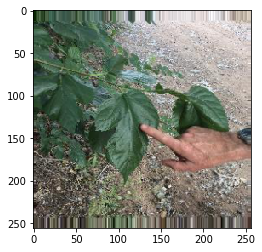

In [41]:
plt.imshow(img.reshape((img.shape[2], img.shape[1], img.shape[3])))
plt.show()